In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [171]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [172]:
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,3,1,0,8,0,1,6,4,0,5
1,2,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,2,...,4,2,0,10,5,3,10,2,6,7
2,3,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,2,...,3,4,0,23,0,3,22,15,15,8
3,4,20,Yes,Travel_Frequently,871,Research & Development,6,3,Life Sciences,4,...,3,2,0,1,5,3,1,0,1,0
4,5,56,Yes,Travel_Rarely,441,Research & Development,14,4,Life Sciences,2,...,3,1,3,7,2,3,5,4,4,3


In [173]:
df.shape

(1033, 32)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 32 columns):
id                          1033 non-null int64
Age                         1033 non-null int64
Attrition                   1033 non-null object
BusinessTravel              1033 non-null object
DailyRate                   1033 non-null int64
Department                  1033 non-null object
DistanceFromHome            1033 non-null int64
Education                   1033 non-null int64
EducationField              1033 non-null object
EnvironmentSatisfaction     1033 non-null int64
Gender                      1033 non-null object
HourlyRate                  1033 non-null int64
JobInvolvement              1033 non-null int64
JobLevel                    1033 non-null int64
JobRole                     1033 non-null object
JobSatisfaction             1033 non-null int64
MaritalStatus               1033 non-null object
MonthlyIncome               1033 non-null int64
MonthlyRate           

In [175]:
test.head()

,id,Name,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,shivani,58,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,...,3,4,1,40,3,2,40,10,15,6
1,2,isha,31,Yes,Travel_Rarely,542,Sales,20,3,Life Sciences,...,3,3,1,4,2,3,2,2,2,2
2,3,smt shyani devi,19,Yes,Travel_Frequently,602,Sales,1,1,Technical Degree,...,4,1,0,1,5,4,0,0,0,0
3,4,divya,29,Yes,Travel_Rarely,121,Sales,27,3,Marketing,...,4,4,3,10,3,2,10,4,1,9
4,5,mansi,21,Yes,Travel_Frequently,756,Sales,1,1,Technical Degree,...,3,3,0,3,3,3,3,2,1,2


In [176]:
df['Attrition'].value_counts()

No     873
Yes    160
Name: Attrition, dtype: int64

In [177]:
df=df.drop('id',1)
test=test.drop('id',1)

In [178]:
Attrition = {'Yes':1,'No':0}

In [179]:
y=df['Attrition'].map(Attrition)
test_y=test['Attrition'].map(Attrition)

In [180]:
train=df.drop('Attrition',1)
test=test.drop('Attrition',1)

In [181]:
intlist=train.select_dtypes(include=['int64']).columns.tolist()

In [182]:
objlist=train.select_dtypes(include=['object']).columns.tolist()

### Pearson Coorelation Test for Conti - Conti Variable

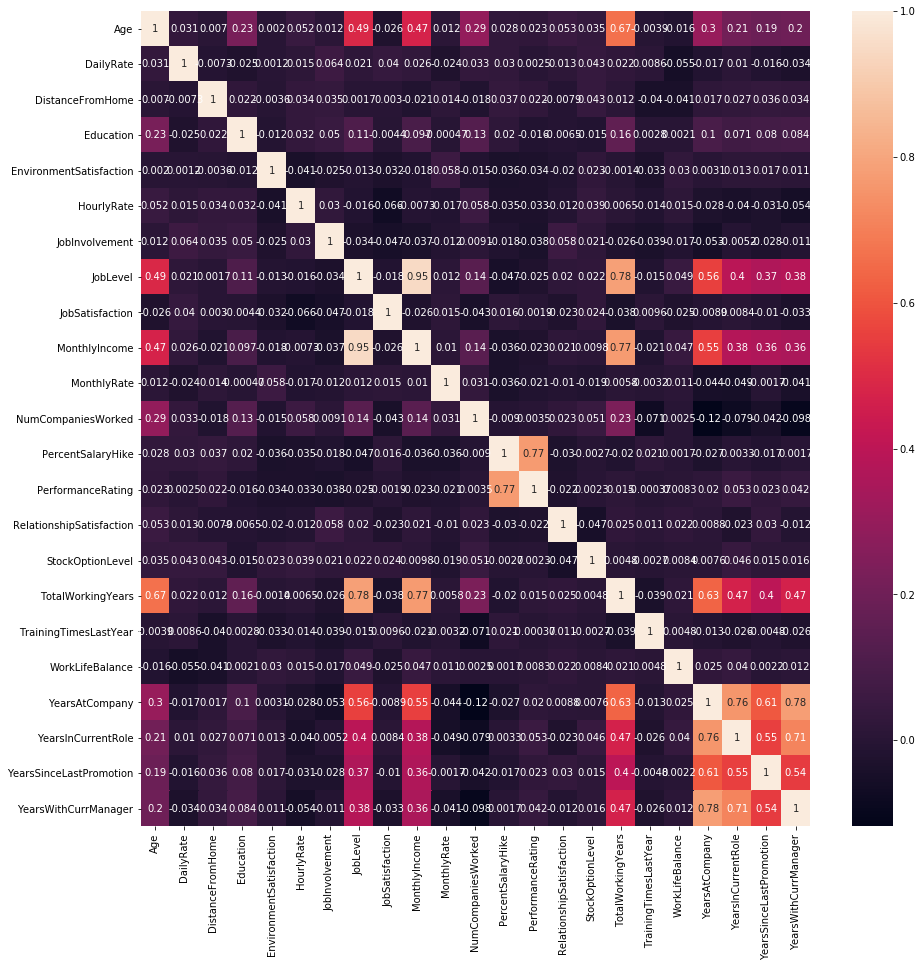

In [202]:
fig=plt.subplots(figsize=(15,15))
sns.heatmap(df[intlist].corr(),annot=True)

### Chi-Square Test for Cat - Cat Variable

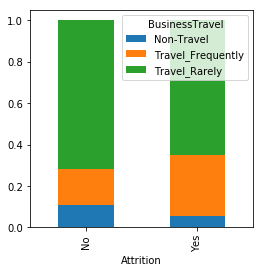

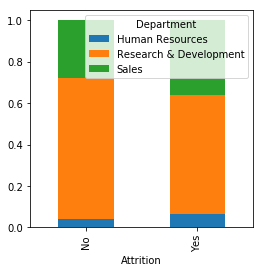

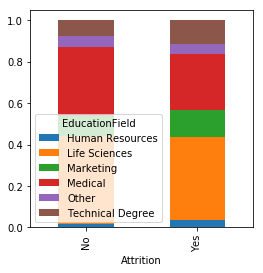

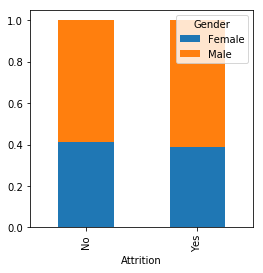

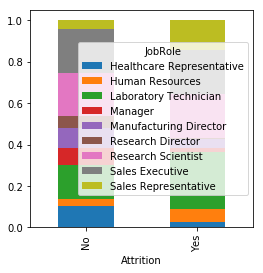

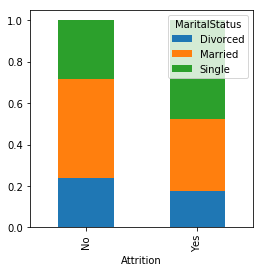

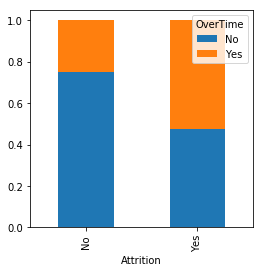

In [184]:
significant_objlist=[]
for obj in objlist:
    ct =pd.crosstab(df['Attrition'],df[obj])
    ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
    s,p,d,a=stats.chi2_contingency(ct)
    if p < 0.01:
        significant_objlist.append(obj)

### Anova test for Conti - Cat Variable

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


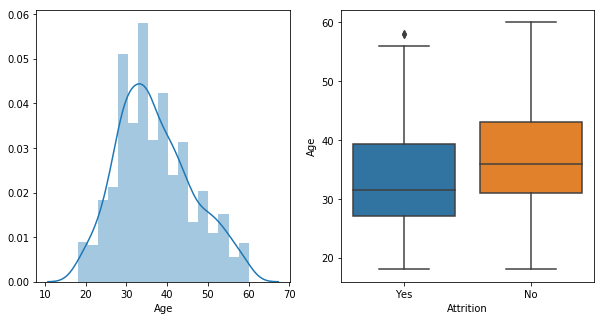

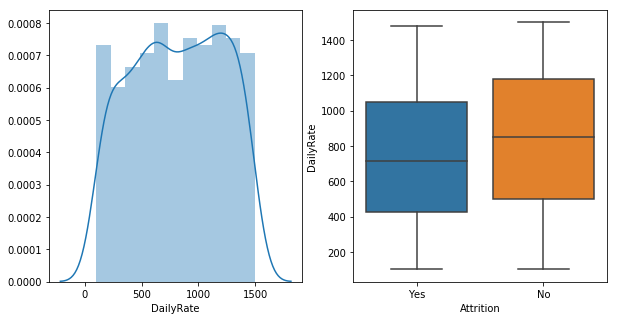

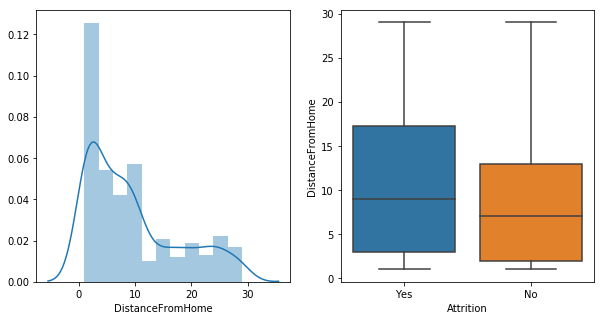

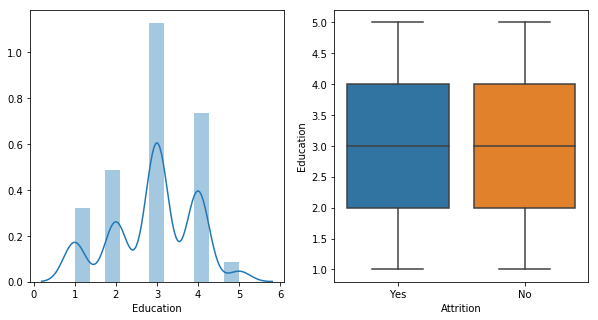

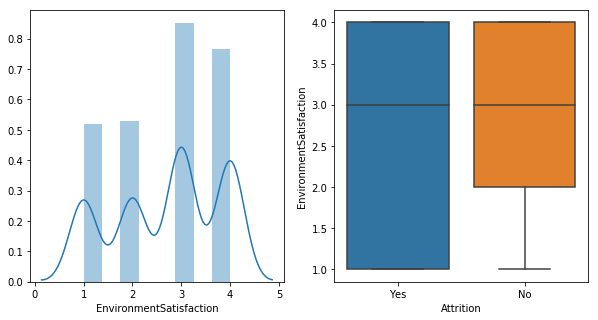

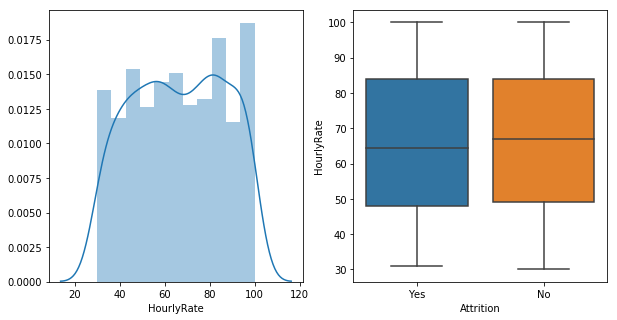

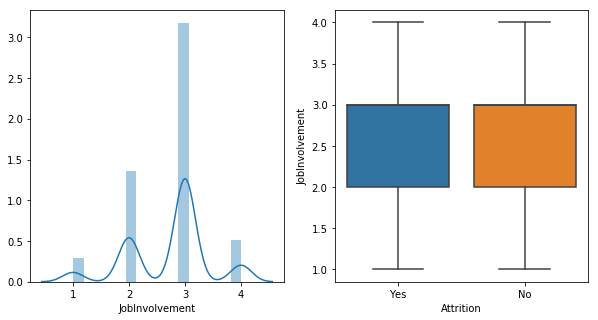

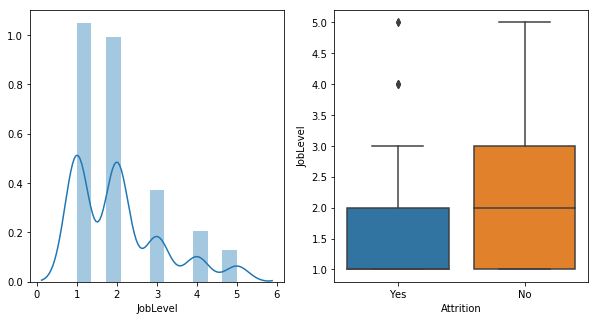

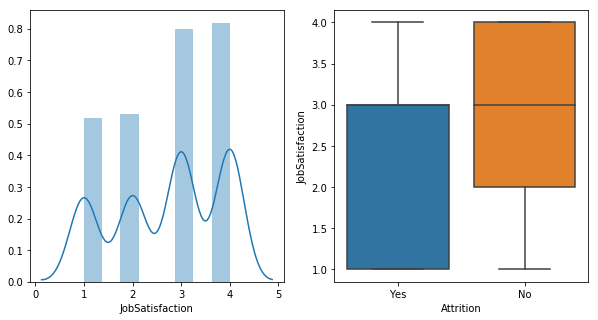

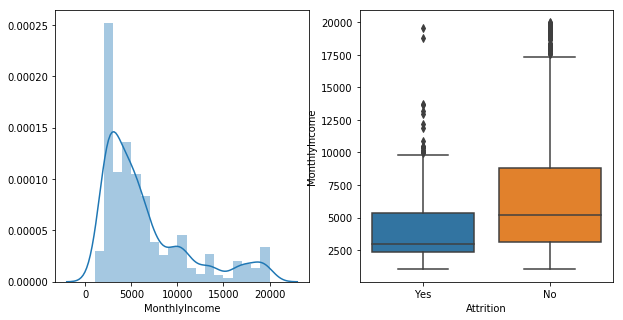

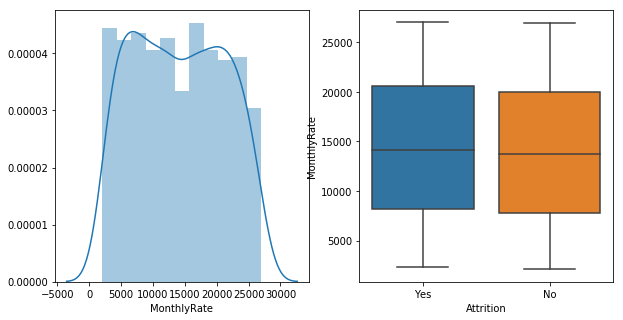

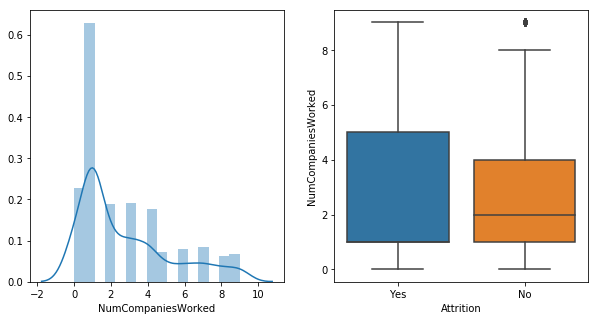

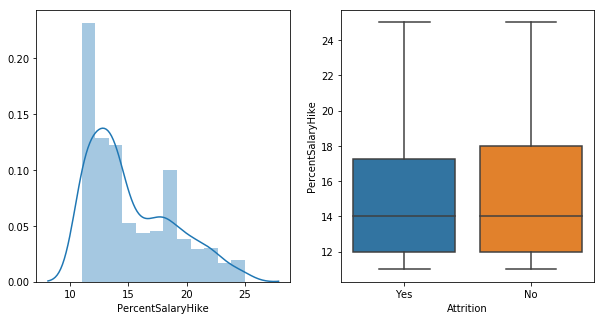

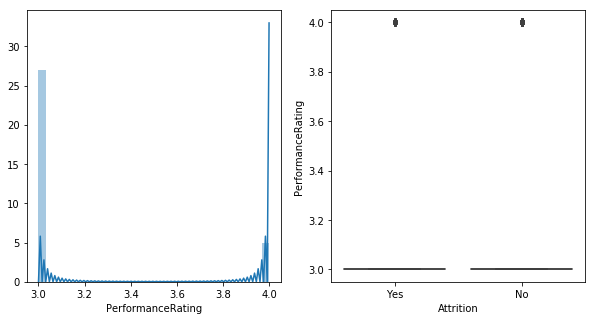

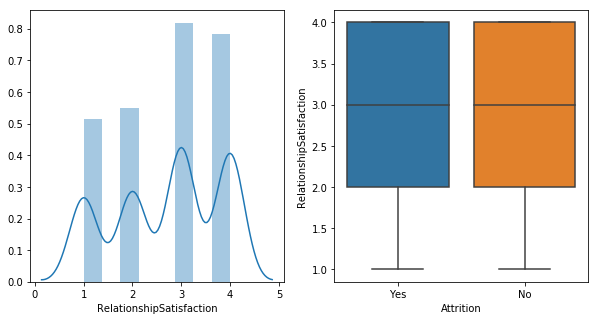

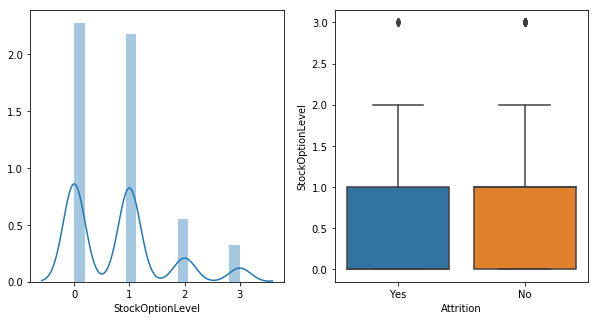

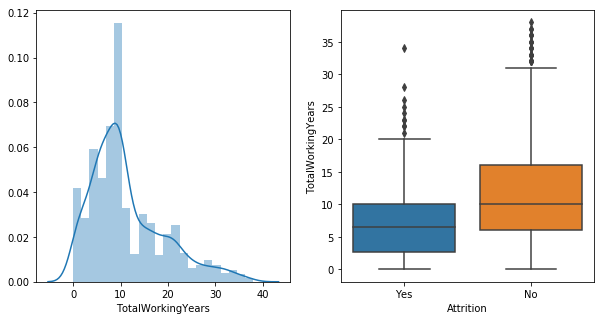

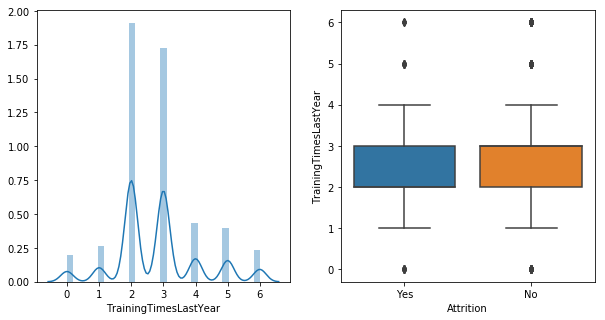

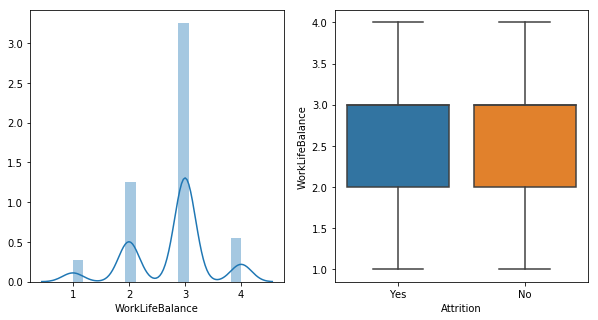

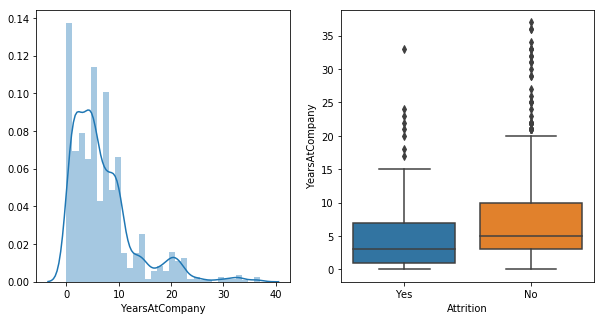

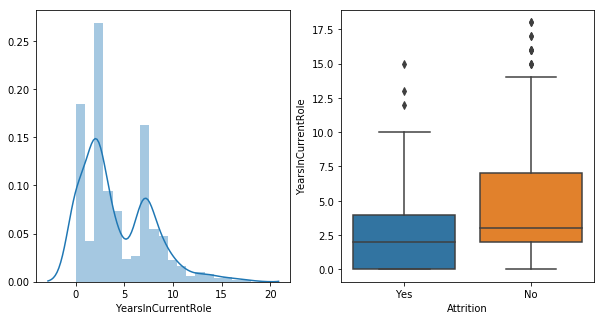

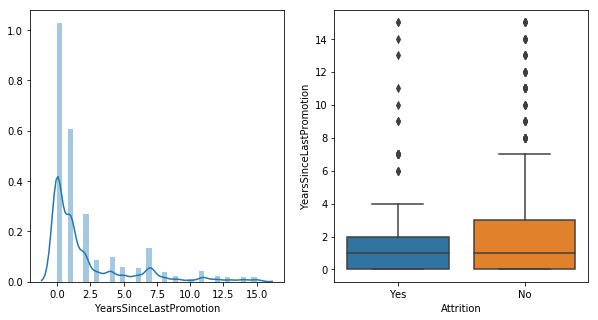

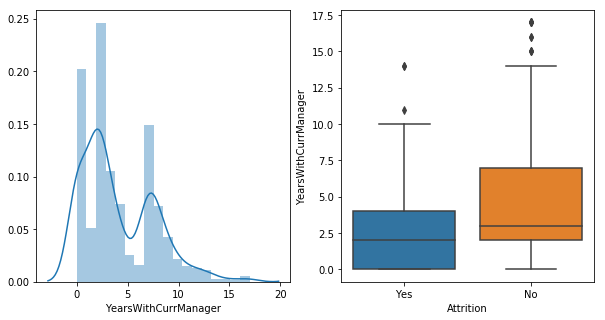

In [185]:
significant_intlist=[]
for intl in intlist:
    fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
    sns.distplot(df[intl],ax=ax1)
    sns.boxplot(y=df[intl],x=df['Attrition'],ax=ax2)
    grp=pd.unique(df['Attrition'].values)
    d_data={grp: df[intl][df['Attrition']==grp] for grp in grp}
    s,p=stats.f_oneway(d_data['Yes'],d_data['No'])
    if p < 0.01:
        significant_intlist.append(intl)

In [186]:
features=significant_objlist + significant_intlist